In [79]:
import tweepy
import csv 
# Here getting all needed credentials(consumer_key,consumer_secert,Access_token,Access_secert)
auth = tweepy.auth.OAuthHandler('Ixy34s7eTLzMr5pLauXkUmBrC', 'O8jXYfd5gbUKNflt2Zg3en5LGr46uhrNVyqpjrWWP507i9VlbC')
auth.set_access_token('541806887-U18EunCCelP1w9JzYJNfH9dI48PxGNviHCo8Mzht', 'wDe88wttfcqc2OAk6qCMFs2tIQljT8sZlG6IBUE3Y6JhY')

api = tweepy.API(auth,wait_on_rate_limit=True)

In [80]:
#Extract 300 user from twitter user
posts=api.user_timeline(screen_name='nature',count=300,lang='en',tweet_mode='extended')

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/user_timeline.json?screen_name=nature&count=300&lang=en&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001AD037DFD68>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed'))

In [ ]:
#print latest 5 tweets
print('Show the latest 5 tweets: \n')
i=1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text+'\n')
    i=i+1

In [81]:
#create a Dataframe with column tweets
import pandas as pd
df=pd.DataFrame([i.full_text for i in posts],columns=['Tweets'])

In [82]:
df.head()

,Tweets
0,Computer scientists had planned to converge fo...
1,"The pandemic has prompted a new, more urgent i..."
2,News &amp; Views: A Nature paper reveals a mec...
3,A study in Nature may help to improve the diag...
4,News &amp; Views: A Nature paper shows that st...


In [84]:
#clean the text
#Create a function to clean the text
import re
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Removing @'s'
    text=re.sub(r'#','',text)#Removing # hash tags
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'RT[\s]+','',text)
    
    return text


df['Tweets']=df['Tweets'].apply(cleantxt)

df.head(2)

,Tweets
0,Computer scientists had planned to converge fo...
1,"The pandemic has prompted a new, more urgent i..."


In [85]:
#Get subjectivity and polarity, subjectivity tells how subjective or opinion the text is, polarity tells how positive or negative the text is

In [86]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df.head(3)

,Tweets,Subjectivity,Polarity
0,Computer scientists had planned to converge fo...,0.341667,0.137500
1,"The pandemic has prompted a new, more urgent i...",0.450909,0.147273
2,News &amp; Views: A Nature paper reveals a mec...,0.000000,0.000000


In [87]:
#To check how well the sentiments are distributed, we use worldcloud, most highly used words are highlighted heavily.

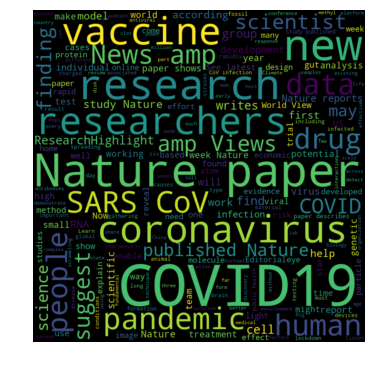

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
allwords=''.join ([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                min_font_size = 5).generate(str(allwords)) 
  
# plot the WordCloud image                       
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [93]:
#Create a function to compute positive, neutral,negative analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [95]:
df.head(3)

,Tweets,Subjectivity,Polarity,Analysis
0,Computer scientists had planned to converge fo...,0.341667,0.137500,Positive
1,"The pandemic has prompted a new, more urgent i...",0.450909,0.147273,Positive
2,News &amp; Views: A Nature paper reveals a mec...,0.000000,0.000000,Neutral


In [104]:
#print all of the positive tweets
j=1
sorteddf=df.sort_values(by='Polarity')
for i in range(0,sorteddf.shape[0]):
    if(sorteddf['Analysis'][i]=='Positive'):
        print(str(j)+ ')' +sorteddf['Tweets'][i])
        print()
        j=j+1

1)Computer scientists had planned to converge for the first major AI conference to be held in an African country. But like most other scientific gatherings, the conference was virtual, depriving Ethiopia of an opportunity to boost its research environment. 

2)The pandemic has prompted a new, more urgent interest in sharing and mining existing data, and in pooling resources. But data sharing requires an understanding of legal, ethical and scientific considerations. Here are six ways to avoid common mistakes. 

3)A study in Nature may help to improve the diagnosis and treatment of allergies. The findings point to a potential marker of these conditions and a new therapeutic strategy.  

4)For a disease that is thought to affect more than 250 million people, COPD has long been overlooked. As prevalence climbs, researchers are working to shed new light on COPD and to meet the growing public-health problem head on. 

5)Researchers and developers around the world have been racing to design p

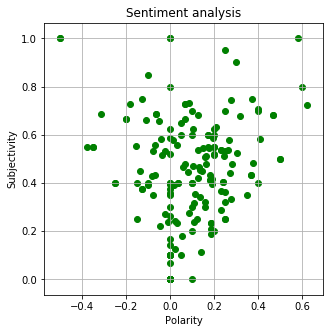

In [111]:
#Plot polarity vs subjectivity
plt.figure(figsize=(5,5))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Green')
plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()

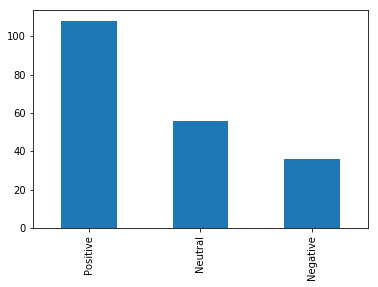

In [112]:
#Lets plot and visualize the counts
df['Analysis'].value_counts().plot(kind='bar')